### Library

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import xlrd
import re
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.preprocessing import OneHotEncoder

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Importing Data

In [5]:
customer = pd.read_csv('/content/QVI_purchase_behaviour.csv')
transaction = pd.read_excel('/content/QVI_transaction_data.xlsx')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Analysing Data

**Exploratory Data Analysis**

1. Transection

In [6]:
transaction.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [7]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
transaction.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [9]:
transaction.nunique().sort_values()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PROD_QTY               6
TOT_SALES            112
PROD_NBR             114
PROD_NAME            114
STORE_NBR            272
DATE                 364
LYLTY_CARD_NBR     72637
TXN_ID            263127
dtype: int64

2. Customer

In [10]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
customer.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [12]:
customer.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [13]:
customer.nunique().sort_values()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PREMIUM_CUSTOMER        3
LIFESTAGE               7
LYLTY_CARD_NBR      72637
dtype: int64

In [14]:
print(customer.PREMIUM_CUSTOMER.unique())
print(customer.LIFESTAGE.unique())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['Premium' 'Mainstream' 'Budget']
['YOUNG SINGLES/COUPLES' 'YOUNG FAMILIES' 'OLDER SINGLES/COUPLES'
 'MIDAGE SINGLES/COUPLES' 'NEW FAMILIES' 'OLDER FAMILIES' 'RETIREES']


### Date Data Types

In [15]:
df_transaction = transaction.copy()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
#change date into date data type
df_transaction.DATE = pd.to_datetime(df_transaction.DATE, unit='D', origin='1899-12-30')
df_transaction.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.2+ MB


pack size and brand name from the data and define metrics of interest to enable you to draw insights on who spends on chips and what drives spends for each customer segment.

### Find Chips

In [17]:
df_transaction.PROD_NAME.unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

In [18]:
# Remove digits from the product names
prod_name = df_transaction['PROD_NAME'].str.replace(r'[0-9]+[gG]','');

# Remove & characters and replace with a space to separate flavours
prod_name = prod_name.str.replace(r'&',' ');

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
prod_name.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.series.Series'>
RangeIndex: 264836 entries, 0 to 264835
Series name: PROD_NAME
Non-Null Count   Dtype 
--------------   ----- 
264836 non-null  object
dtypes: object(1)
memory usage: 2.0+ MB


In [20]:
# Count the frequencies of words in product names and display counts in descending order
prod_counts = pd.Series(' '.join(prod_name).split()).value_counts()

with pd.option_context('display.max_rows', None): # show all rows
  display(prod_counts)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


175g                  60561
Chips                 49770
150g                  41633
Kettle                41288
Smiths                28860
Salt                  27976
Cheese                27890
Pringles              25102
134g                  25102
Doritos               24962
Crinkle               23960
110g                  22387
Corn                  22063
Original              21560
Cut                   20754
Chip                  18645
170g                  18502
Salsa                 18094
Chicken               15407
Chilli                15390
165g                  15297
Sea                   14145
Thins                 14075
Sour                  13882
Crisps                12607
330g                  12540
Vinegar               12402
300g                  12041
RRD                   11894
Sweet                 11060
Infuzions             11057
Supreme               10963
Chives                10951
Cream                 10723
WW                    10320
Popd                

There are salsa products in the dataset but we are only interested in the chips category, so let’s remove
these.

In [21]:
# remove salsa
df_transaction = df_transaction[df_transaction.PROD_NAME.str.contains(r"[Ss]alsa") == False]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
#check null
df_transaction.isnull().values.any()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


False

In [23]:
df_transaction.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(246742, 8)

In [24]:
df_transaction.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246742,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000
mean,2018-12-30 01:19:01.211467520,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000
std,NaN,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828


In [25]:
# Filter the entries that have 200 packets.
df_transaction.loc[df_transaction['PROD_QTY'] == 200.0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


The same customer has made these transactions. They could have been for commercial purposes so we can check to see if they made any other purchases.

In [26]:
# Filter the entires by the customer
df_transaction.loc[df_transaction['LYLTY_CARD_NBR'] == 226000]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


It looks like this is the only purchase they have made so we will remove these transactions from the dataset.

In [27]:
# Remove the transactions
trans_df = df_transaction[df_transaction['LYLTY_CARD_NBR'] != 226000]
trans_df.shape # check for a reduction of 2 rows (before = 246742 rows)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(246740, 8)

In [28]:
df_transaction.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246742,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000
mean,2018-12-30 01:19:01.211467520,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000
std,NaN,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828


The summaries now look reasonable. Now look at the number of transaction lines over time to see if there are any obvious data issues such as missing data from particular days.

In [29]:
# Missing day by counting transactions by date
count = df_transaction.groupby(df_transaction['DATE'].dt.date).size().reset_index(name = 'COUNT')
count.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(364, 2)

In [30]:
# 1. See the date range
df_transaction.sort_values(by='DATE')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
136301,2018-07-01,9,9341,8808,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0
157526,2018-07-01,86,86016,84237,48,Red Rock Deli Sp Salt & Truffle 150G,2,5.4
126416,2018-07-01,129,129046,132474,82,Smith Crinkle Cut Mac N Cheese 150g,2,5.2
121423,2018-07-01,58,58072,53145,99,Pringles Sthrn FriedChicken 134g,2,7.4
73583,2018-07-01,97,97164,97311,92,WW Crinkle Cut Chicken 175g,2,3.4
...,...,...,...,...,...,...,...,...
245590,2019-06-30,91,91076,89519,40,Thins Chips Seasonedchicken 175g,2,6.6
231677,2019-06-30,84,84116,83704,77,Doritos Corn Chips Nacho Cheese 170g,2,8.8
186851,2019-06-30,24,24115,20917,100,Smiths Crinkle Cut Chips Chs&Onion170g,2,5.8
13810,2019-06-30,199,199117,198068,77,Doritos Corn Chips Nacho Cheese 170g,2,8.8


the date range start from 1 July 2018 to 30 June 2019

In [31]:
#2. check the missing date
missing_date = df_transaction.groupby('DATE').size()
pd.date_range(start = '2018-07-01', end = '2019-06-30' ).difference(missing_date.index)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

the missing date is Christmast day in 2018, it is expected to be no sales in that day because it was a holiday


Now we move onto creating other features such as the pack size, and checking this for any outliers.

In [32]:
# Add a new column to data with packet sizes and extract sizes from product name column
df_transaction.insert(8, "PACK_SIZE", df_transaction['PROD_NAME'].str.extract('(\d+)').astype(float), True)

# Sort by packet sizes to check for outliers
df_transaction.sort_values(by='PACK_SIZE')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:2: DeprecationWarning: invalid escape sequence '\d'
<>:2: DeprecationWarning: invalid escape sequence '\d'
<ipython-input-32-eabca21f2c3a>:2: DeprecationWarning: invalid escape sequence '\d'
  df_transaction.insert(8, "PACK_SIZE", df_transaction['PROD_NAME'].str.extract('(\d+)').astype(float), True)


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
46694,2019-02-04,162,162202,163019,38,Infuzions Mango Chutny Papadums 70g,2,4.8,70.0
203179,2019-01-04,258,258051,257352,38,Infuzions Mango Chutny Papadums 70g,2,4.8,70.0
165827,2019-05-25,197,197343,197307,38,Infuzions Mango Chutny Papadums 70g,2,4.8,70.0
198867,2018-08-28,196,196012,195458,38,Infuzions Mango Chutny Papadums 70g,2,4.8,70.0
2690,2018-11-02,136,136253,138630,38,Infuzions Mango Chutny Papadums 70g,1,2.4,70.0
...,...,...,...,...,...,...,...,...,...
63293,2019-05-03,145,145104,145308,4,Dorito Corn Chp Supreme 380g,2,13.0,380.0
197954,2018-11-19,180,180070,181430,14,Smiths Crnkle Chip Orgnl Big Bag 380g,2,11.8,380.0
120796,2019-04-26,47,47199,42610,14,Smiths Crnkle Chip Orgnl Big Bag 380g,2,11.8,380.0
197986,2019-02-27,180,180143,181934,14,Smiths Crnkle Chip Orgnl Big Bag 380g,2,11.8,380.0


In [33]:
df_transaction.PACK_SIZE.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


count    246742.000000
mean        175.585178
std          59.434727
min          70.000000
25%         150.000000
50%         170.000000
75%         175.000000
max         380.000000
Name: PACK_SIZE, dtype: float64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


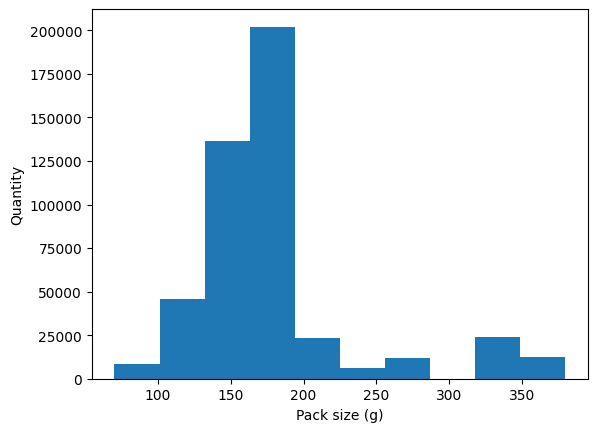

In [34]:
# Plot a histogram to visualise distribution of pack sizes.
plt.hist(df_transaction['PACK_SIZE'], weights=df_transaction['PROD_QTY']);
plt.xlabel('Pack size (g)');
plt.ylabel('Quantity');

Now that the pack size looks reasonable, we can create the brand names using the first word of each product name.

In [35]:
# Add a column to extract each product name in the first word
df_transaction.insert(9, "BRAND_NAME",df_transaction['PROD_NAME'].str.split().str.get(0), True)
df_transaction

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND_NAME
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175.0,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150.0,Kettle
...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175.0,Kettle
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175.0,Tostitos
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170.0,Doritos
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150.0,Doritos


In [36]:
# Check Brand Name
df_transaction["BRAND_NAME"].unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Grain', 'Doritos',
       'Twisties', 'WW', 'Thins', 'Burger', 'NCC', 'Cheezels', 'Infzns',
       'Red', 'Pringles', 'Dorito', 'Infuzions', 'Smith', 'GrnWves',
       'Tyrrells', 'Cobs', 'French', 'RRD', 'Tostitos', 'Cheetos',
       'Woolworths', 'Snbts', 'Sunbites'], dtype=object)

Some brand names have been doubled up. Replace all contractions and double ups with their full name.

In [37]:
# Function to identify to map the brand names into the same brand name
def replace_name(line):
  name = line['BRAND_NAME']
  if name == "Infzns":
        return "Infuzions"
  elif name == "Red":
        return "Red Rock Deli"
  elif name == "RRD":
        return "Red Rock Deli"
  elif name == "Grain":
        return "Grain Waves"
  elif name == "GrnWves":
        return "Grain Waves"
  elif name == "Snbts":
        return "Sunbites"
  elif name == "Natural":
        return "Natural Chip Co"
  elif name == "NCC":
        return "Natural Chip Co"
  elif name == "WW":
        return "Woolworths"
  elif name == "Smith":
        return "Smiths"
  elif name == "Dorito":
        return "Doritos"
  else:
        return name
#Apply function in clean brand names
df_transaction.BRAND_NAME = df_transaction.apply(lambda line: replace_name(line), axis=1)

#check duplicate
df_transaction.BRAND_NAME.unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['Natural Chip Co', 'CCs', 'Smiths', 'Kettle', 'Grain Waves',
       'Doritos', 'Twisties', 'Woolworths', 'Thins', 'Burger', 'Cheezels',
       'Infuzions', 'Red Rock Deli', 'Pringles', 'Tyrrells', 'Cobs',
       'French', 'Tostitos', 'Cheetos', 'Sunbites'], dtype=object)

The brand names seme reasonable, without duplicates.

Now we want to examine the customer data. We can generate summaries and check the categories in this dataset.

In [38]:
# Examine Customer Data
df_customer = customer.copy()
df_customer.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [39]:
#Rename column name into 'MEMBER_TYPE'
df_customer = df_customer.rename(columns={'PREMIUM_CUSTOMER' : 'MEMBER_TYPE'})

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [40]:
df_customer.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


In [41]:
# Chek the member type
df_customer.MEMBER_TYPE.unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['Premium', 'Mainstream', 'Budget'], dtype=object)

In [42]:
df_customer.LIFESTAGE.unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
       'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'RETIREES'], dtype=object)

Now that the customer dataset looks fine, we want to add this information to the transactions dataset.

In [43]:
#Join customer data and transaction data then short transaction by date
df_all = df_transaction.set_index('LYLTY_CARD_NBR').join(df_customer.set_index('LYLTY_CARD_NBR'))
df_all = df_all.reset_index()
df_all = df_all.sort_values(by='DATE').reset_index(drop=True)
df_all

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND_NAME,LIFESTAGE,MEMBER_TYPE
0,207165,2018-07-01,207,205566,16,Smiths Crinkle Chips Salt & Vinegar 330g,2,11.4,330.0,Smiths,MIDAGE SINGLES/COUPLES,Mainstream
1,58195,2018-07-01,58,53678,26,Pringles Sweet&Spcy BBQ 134g,2,7.4,134.0,Pringles,MIDAGE SINGLES/COUPLES,Mainstream
2,58201,2018-07-01,58,53702,47,Doritos Corn Chips Original 170g,2,8.8,170.0,Doritos,RETIREES,Budget
3,58242,2018-07-01,58,53871,62,Pringles Mystery Flavour 134g,2,7.4,134.0,Pringles,OLDER SINGLES/COUPLES,Mainstream
4,207184,2018-07-01,207,205693,32,Kettle Sea Salt And Vinegar 175g,2,10.8,175.0,Kettle,RETIREES,Premium
...,...,...,...,...,...,...,...,...,...,...,...,...
246737,104100,2019-06-30,104,104327,18,Cheetos Chs & Bacon Balls 190g,2,6.6,190.0,Cheetos,OLDER SINGLES/COUPLES,Mainstream
246738,125122,2019-06-30,125,128751,20,Doritos Cheese Supreme 330g,2,11.4,330.0,Doritos,YOUNG SINGLES/COUPLES,Mainstream
246739,130290,2019-06-30,130,134866,16,Smiths Crinkle Chips Salt & Vinegar 330g,2,11.4,330.0,Smiths,RETIREES,Budget
246740,80151,2019-06-30,80,78870,3,Kettle Sensations Camembert & Fig 150g,2,9.2,150.0,Kettle,OLDER SINGLES/COUPLES,Mainstream


In [44]:
#check null
df_all.isnull().values.any()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


False

In [45]:
df_all.to_csv('QVI_alldata.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Data Anlaysis on Customer Segments
Now that the data has been cleaned, we want to look for interesting insights in the chip market to help recommend a business strategy.

To do so, some metrics we want to consider are:

* Who spends the most on chips (total sales), describing customers by lifestage and how premium their general purchasing behaviour is
* How many customers are in each segment
* How many chips are bought per customer by segment
* What's the average chip price by customer segment

Some more information from the data team that we could ask for, to analyse with the chip information for more insight includes

* The customer’s total spend over the period and total spend for each transaction to understand what proportion of their grocery spend is on chips.
* Spending on other snacks, such as crackers and biscuits, to determine the preference and the purchase frequency of chips compared to other snacks
* Proportion of customers in each customer segment overall to compare against the mix of customers who purchase chips

Firstly, we want to take a look at the split of the total sales by LIFESTAGE and MEMBER_TYPE.

In [48]:
# calculate total sales by lifestage and member type
customer_totsales = df_all.groupby(['LIFESTAGE','MEMBER_TYPE'], as_index=False)['TOT_SALES'].agg(['sum'])
customer_totsales = customer_totsales.rename(columns={'sum' : 'sum_totsales'})
customer_totsales.sort_values(by='sum_totsales', ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,LIFESTAGE,MEMBER_TYPE,sum_totsales
6,OLDER FAMILIES,Budget,156863.75
19,YOUNG SINGLES/COUPLES,Mainstream,147582.20
13,RETIREES,Mainstream,145168.95
15,YOUNG FAMILIES,Budget,129717.95
9,OLDER SINGLES/COUPLES,Budget,127833.60
10,OLDER SINGLES/COUPLES,Mainstream,124648.50
11,OLDER SINGLES/COUPLES,Premium,123537.55
12,RETIREES,Budget,105916.30
7,OLDER FAMILIES,Mainstream,96413.55
14,RETIREES,Premium,91296.65


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


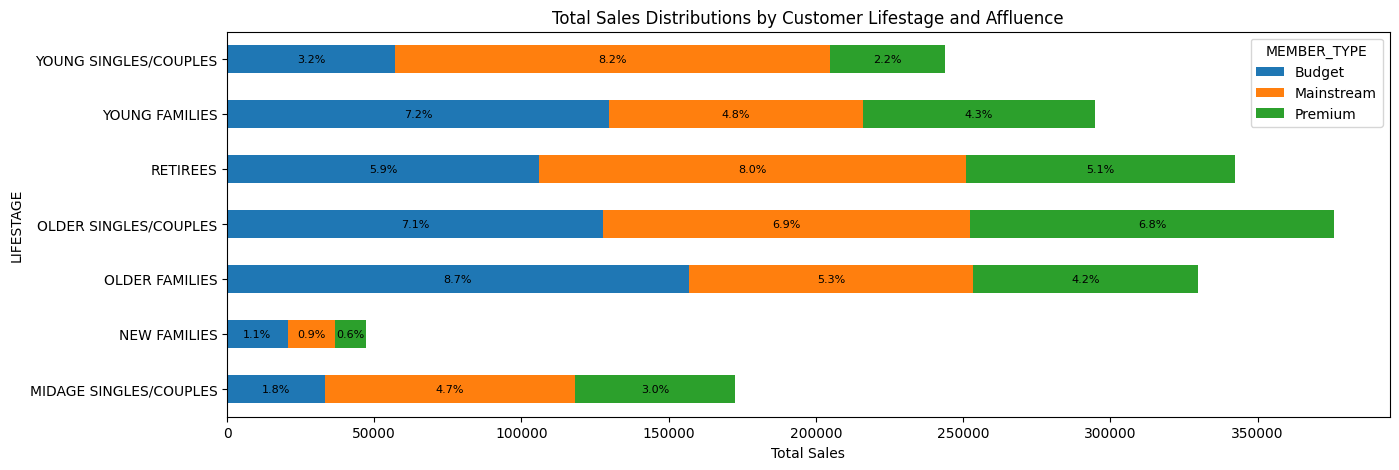

In [50]:
# Total Sales
totsales= df_all['TOT_SALES'].agg(['sum'])['sum']

# Breakdown the total sales by lifestage and member type
totsales_breakdown = df_all.groupby(['LIFESTAGE', 'MEMBER_TYPE'], as_index= True)['TOT_SALES'].agg(['sum', 'mean']).unstack('MEMBER_TYPE').fillna(0)
ax= totsales_breakdown['sum'].plot(kind='barh', stacked=True, figsize=(15, 5))

# Add % of the summed total sales
for rect in ax.patches:
  #find where each label is located
  height = rect.get_height()
  width = rect.get_width()
  label = width / totsales*100
  x= rect.get_x()
  y=rect.get_y()

  label_text = f'{(label):.1f}%'

  #set label positions
  label_x = x + width / 2
  label_y = y + height / 2

  # plot labels > given width
  if width >0 :
    ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize =8)
ax.set_xlabel('Total Sales')
ax.set_title('Total Sales Distributions by Customer Lifestage and Affluence')
plt.show()

Here, we can see the most sales are from Older families - Budget, Young singles/couples - Mainstream and Retirees - Mainstream. We can see if this is because of the customer numbers in each segment.

In [51]:
# Check all rows are unique in customer info
len(df_customer['LYLTY_CARD_NBR'].unique()) == df_customer.shape[0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


True

In [52]:
# Check if all customers made chip purschase
len(df_customer['LYLTY_CARD_NBR'].unique()) == len(df_all['LYLTY_CARD_NBR'].unique())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


False

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


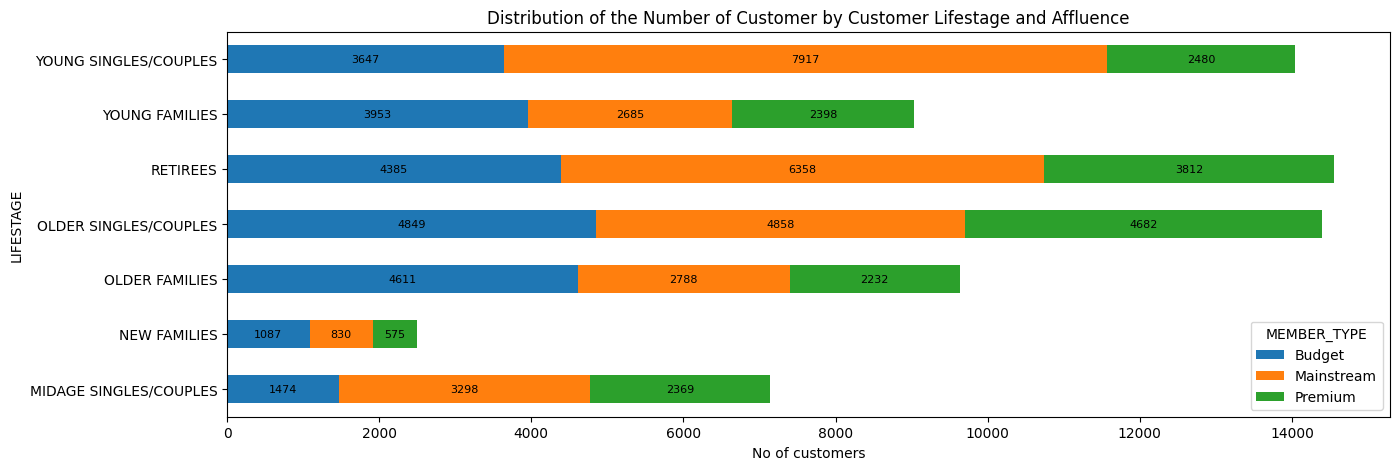

In [56]:
# Plot the numbers of customers in each segment by counting the unique LYLTY_CARD_NBR entries
sum_customer = df_all.groupby(['LIFESTAGE', 'MEMBER_TYPE'])['LYLTY_CARD_NBR'].agg('nunique').unstack('MEMBER_TYPE').fillna(0)
ax = sum_customer.plot(kind='barh', stacked=True, figsize=(15, 5))

# Add customer numbers as label
for rect in ax.patches:
  #find where everything is located
  height = rect.get_height()
  width = rect.get_width()
  x = rect.get_x()
  y = rect.get_y()

  label_text = f'{(width):.0f}'

  #set label positions
  label_x = x + width / 2
  label_y = y + height / 2

  #only plot labels > given width
  if width > 0:
    ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=8)

ax.set_xlabel('No of customers')
ax.set_title('Distribution of the Number of Customer by Customer Lifestage and Affluence')
plt.show()

There are more Young singles/couples - mainstream and Retirees - mainstream who buy chips. This contributes to there being more sales to these customer segments but this is not a major driver for the Older families - budget segment.

We can then take a look at the total and average units of chips bought per customer by LIFESTAGE and MEMBER_TYPE.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


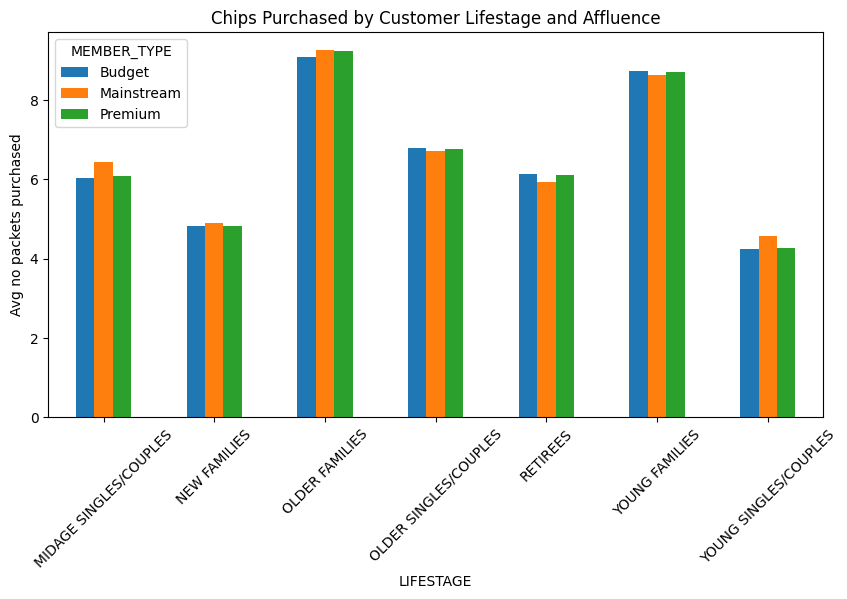

In [57]:
# Plot the average no of chip pack bought per customer by LIFESTAGE and MEMBER_TYPE.
no_pack_data = df_all.groupby(['LIFESTAGE','MEMBER_TYPE'])['PROD_QTY'].sum()/df_all.groupby(['LIFESTAGE','MEMBER_TYPE'])['LYLTY_CARD_NBR'].nunique(0)
ax = no_pack_data.unstack('MEMBER_TYPE').fillna(0).plot.bar(stacked = False,figsize=(10, 5))
ax.set_ylabel("Avg no packets purchased")
ax.set_title('Chips Purchased by Customer Lifestage and Affluence')
plt.xticks(rotation=45)
plt.show()

Older families and young families in general buy more chips per customer. We can also investigate the average price per unit sold by LIFESTAGE and MEMBER_TYPE.

In [59]:
# Column for the unit price of chips purchased per transaction
df_all['UNIT_PRICE'] = df_all['TOT_SALES']/df_all['PROD_QTY']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


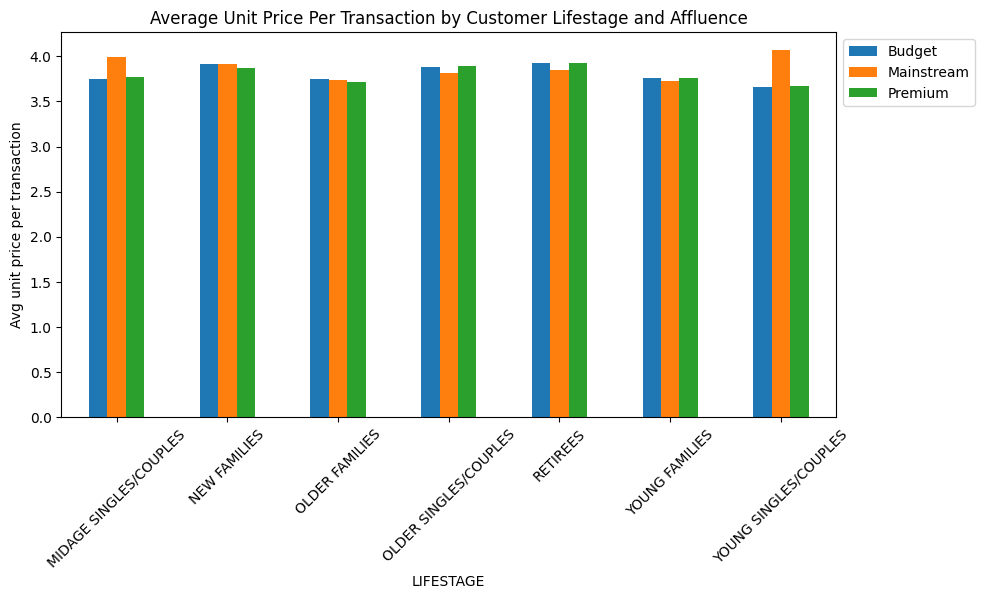

In [61]:
# Plot the distribution of the average unit price per transaction by LIFESTAGE and MEMBER_TYPE.
avg_priceperunit = df_all.groupby(['LIFESTAGE', 'MEMBER_TYPE'], as_index = True)['UNIT_PRICE'].agg(['mean']).unstack('MEMBER_TYPE').fillna(0)
ax = avg_priceperunit['mean'].plot.bar(stacked=False, figsize=(10, 5))
ax.set_ylabel("Avg unit price per transaction")
ax.set_title('Average Unit Price Per Transaction by Customer Lifestage and Affluence')
plt.legend(loc = "upper left",bbox_to_anchor=(1.0, 1.0))
plt.xticks(rotation=45)
plt.show()

For young and midage singles/couples, the mainstream group are more willing to pay more for a packet of chips than their budget and premium counterpart. Given the total sales, as well as the number of customers buying chips, is higher in these groups compared to the non-mainstream groups, this suggests that chips may not be the choice of snack for these groups. Further information on shopping habits would be useful in this case.

As the difference in average price per unit isn’t large, we can check if this difference is statistically different, with a t-test.

In [62]:
# Check the difference in the average price unit between the mainstream and premium/budget groups for young/midage singles/couples
from scipy.stats import ttest_ind

# Identify the groups to test the hypthesis with
mainstream = df_all["MEMBER_TYPE"] == "Mainstream"
young_midage = (df_all["LIFESTAGE"] == "MIDAGE SINGLES/COUPLES") | (df_all["LIFESTAGE"] == "YOUNG SINGLES/COUPLES")
premium_budget = df_all["MEMBER_TYPE"] != "Mainstream"

group1 = df_all[mainstream & young_midage]["UNIT_PRICE"]
group2 = df_all[premium_budget & young_midage]["UNIT_PRICE"]

# Generate the t-test
stat, pval = ttest_ind(group1.values, group2.values, equal_var=False)

print(pval, stat)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


6.967354232991983e-306 37.6243885962296


The **t-test results in a p-value of 6.97e-306, being close to 0,** indicates that the unit price for mainstream, young and mid-age singles and couples ARE significantly higher than that of budget or premium, young and midage singles and couples.

## Deep Dive into Specific Customer Segments for Insights

We have found quite a few interesting insights that we can dive deeper into. We might want to target customer segments that contribute the most to sales to retain them or further increase sales. Let's look at Mainstream - young singles/couples. For instance, let's find out if they tend to buy a particular brand of chips.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


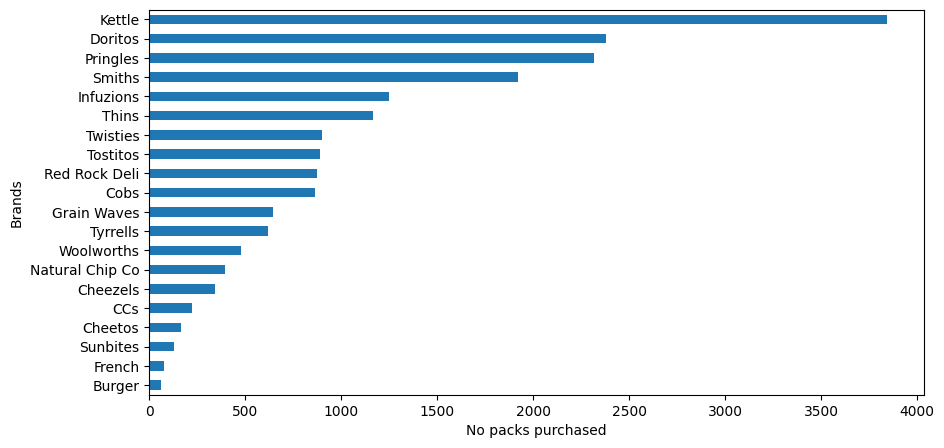

In [63]:
# Visual of what kind of brand young singles/couples are purchasing the most
young_mainstream = df_all.loc[df_all['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES']
young_mainstream = young_mainstream.loc[young_mainstream['MEMBER_TYPE']=='Mainstream']
ax = young_mainstream['BRAND_NAME'].value_counts().sort_values(ascending=True).plot.barh(figsize=(10,5))
ax.set_xlabel('No packs purchased')
ax.set_ylabel('Brands')
plt.show()

We can see that :
* Mainstream young singles/couples are 23% more likely to purchase Tyrrells chips compared to the
rest of the population
* Mainstream young singles/couples are 56% less likely to purchase Burger Rings compared to the rest
of the population


Let’s also find out if our target segment tends to buy larger packs of chips.


Conclusion
Let’s recap what we’ve found!
Sales have mainly been due to Budget - older families, Mainstream - young singles/couples, and Mainstream -retirees shoppers. We found that the high spend in chips for mainstream young singles/couples and retirees is due to there being more of them than other buyers. Mainstream, midage and young singles and
couples are also more likely to pay more per packet of chips. This is indicative of impulse buying behaviour.
We’ve also found that Mainstream young singles and couples are 23% more likely to purchase Tyrrells chips
compared to the rest of the population. The Category Manager may want to increase the category’s performance by off-locating some Tyrrells and smaller packs of chips in discretionary space near segments
where young singles and couples frequent more often to increase visibilty and impulse behaviour.
Quantium can help the Category Manager with recommendations of where these segments are and further
help them with measuring the impact of the changed placement. We’ll work on measuring the impact of
trials in the next task and putting all these together in the third task